# Práctica 6: Modelos lineales con scipy.stats

El objetivo de esta práctica es modeloar por los menos dos aspectos que tengan los datos con modelos lineales simples. Se utiliza la nueva herramienta de scipy para realizar dichas operaciones. 

En la práctica anterior se realizó un mapa de calor para revisar las correlaciones que tienen entre ellos los datos dentro del csv. 

In [21]:
import plotly.offline as py
import numpy as np
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

correlation = e.corr()
#tick labels
matrix_cols = correlation.columns.tolist()
#convert to array
corr_array  = np.array(correlation)
#Plotting
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   xgap = 2,
                   ygap = 2,
                   colorscale='Rainbow',
                   colorbar   = dict() ,
                  )
layout = go.Layout(dict(title = 'Correlation Matrix for variables',
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                     ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9)),
                       )
                  )
fig = go.Figure(data = [trace],layout = layout)
py.iplot(fig)

La diagonal principal es la que se encuentra una columna con si misma, pero gracias a la coloración de este mapa, se puede apreciar rápidamente cuales son los elementos que se relacionan y cuales son los que no.

Una vez que tenemos identificados dichos elementos, podemos empezar a hacer comparaciones entre los que estan muy correlacionados y los que no estan nada correlacionados.

Se ven a continuación 4 gráficas de elementos relacionados, y otras cuatro después de elementos no relacionados.

/Users/mayraberrones/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  # This is added back by InteractiveShellApp.init_path()


0.9138855338096619 1.7342190612392723e-17 0.05 no normal
0.9138855338096619 1.7342190612392723e-17 0.01 no normal


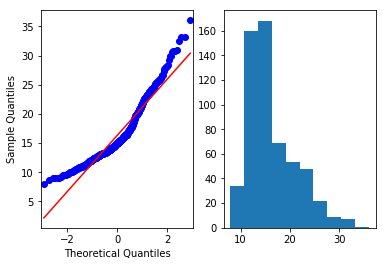

In [6]:
import pandas as pd
from numpy import isnan
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import ssl

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
e = pd.read_csv("https://raw.githubusercontent.com/mayraberrones94/Ciencia_de_Datos/master/w-data.csv")
d1 = e.loc[e.radius_worst]
d2 = e.loc[~isnan(e.radius_mean)]
m = pd.concat([d1, d2])
d = m.radius_worst.dropna()
f, ax = plt.subplots(1, 2)
qqplot(d, line='s', ax = ax[0])
ax[1] = plt.hist(d)
for a in [0.05, 0.01]:
    s, p = shapiro(d)
    print(s, p, a, "normal" if p > a else "no normal")
plt.show()

/Users/mayraberrones/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


0.9138855338096619 1.7342190612392723e-17 0.05 no normal
0.9138855338096619 1.7342190612392723e-17 0.01 no normal


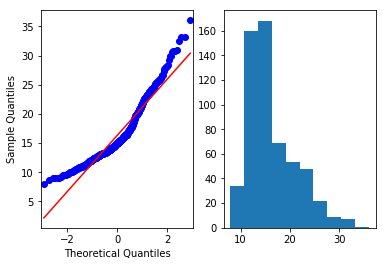

In [7]:
d1 = e.loc[e.radius_worst]
d2 = e.loc[~isnan(e.perimeter_mean)]
m = pd.concat([d1, d2])
d = m.radius_worst.dropna()
f, ax = plt.subplots(1, 2)
qqplot(d, line='s', ax = ax[0])
ax[1] = plt.hist(d)
for a in [0.05, 0.01]:
    s, p = shapiro(d)
    print(s, p, a, "normal" if p > a else "no normal")
plt.show()

/Users/mayraberrones/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


0.9331727623939514 1.4505056998112445e-15 0.05 no normal
0.9331727623939514 1.4505056998112445e-15 0.01 no normal


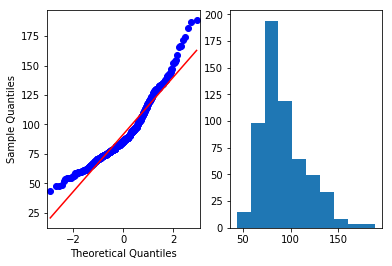

In [9]:
d1 = e.loc[e.perimeter_mean]
d2 = e.loc[~isnan(e.radius_worst)]
m = pd.concat([d1, d2])
d = m.perimeter_mean.dropna()
f, ax = plt.subplots(1, 2)
qqplot(d, line='s', ax = ax[0])
ax[1] = plt.hist(d)
for a in [0.05, 0.01]:
    s, p = shapiro(d)
    print(s, p, a, "normal" if p > a else "no normal")
plt.show()

/Users/mayraberrones/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


0.854504406452179 3.9272559797657846e-23 0.05 no normal
0.854504406452179 3.9272559797657846e-23 0.01 no normal


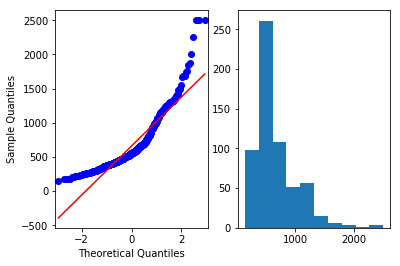

In [10]:
d1 = e.loc[e.area_mean]
d2 = e.loc[~isnan(e.radius_worst)]
m = pd.concat([d1, d2])
d = m.area_mean.dropna()
f, ax = plt.subplots(1, 2)
qqplot(d, line='s', ax = ax[0])
ax[1] = plt.hist(d)
for a in [0.05, 0.01]:
    s, p = shapiro(d)
    print(s, p, a, "normal" if p > a else "no normal")
plt.show()

/Users/mayraberrones/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


0.9769935607910156 7.756307951467534e-08 0.05 no normal
0.9769935607910156 7.756307951467534e-08 0.01 no normal


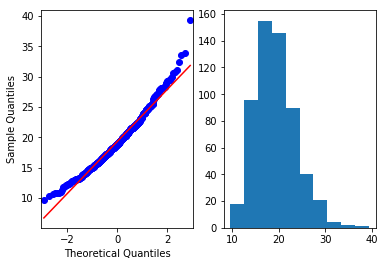

In [11]:
d1 = e.loc[e.texture_mean]
d2 = e.loc[~isnan(e.texture_worst)]
m = pd.concat([d1, d2])
d = m.texture_mean.dropna()
f, ax = plt.subplots(1, 2)
qqplot(d, line='s', ax = ax[0])
ax[1] = plt.hist(d)
for a in [0.05, 0.01]:
    s, p = shapiro(d)
    print(s, p, a, "normal" if p > a else "no normal")
plt.show()

/Users/mayraberrones/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


0.8131364583969116 1.3208961865742285e-25 0.05 no normal
0.8131364583969116 1.3208961865742285e-25 0.01 no normal


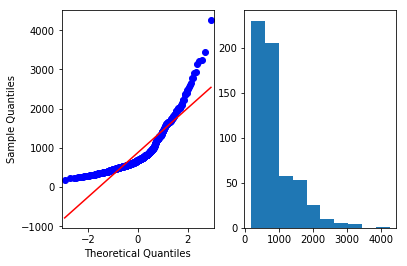

In [12]:
d1 = e.loc[e.area_worst]
d2 = e.loc[~isnan(e.radius_worst)]
m = pd.concat([d1, d2])
d = m.area_worst.dropna()
f, ax = plt.subplots(1, 2)
qqplot(d, line='s', ax = ax[0])
ax[1] = plt.hist(d)
for a in [0.05, 0.01]:
    s, p = shapiro(d)
    print(s, p, a, "normal" if p > a else "no normal")
plt.show()

/Users/mayraberrones/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


0.854504406452179 3.9272559797657846e-23 0.05 no normal
0.854504406452179 3.9272559797657846e-23 0.01 no normal


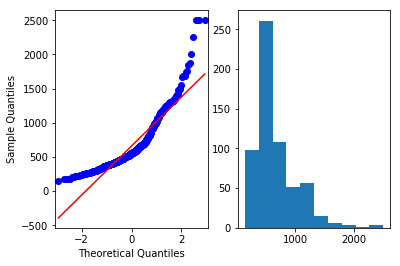

In [14]:
d1 = e.loc[e.area_mean]
d2 = e.loc[~isnan(e.fractal_dimension_mean)]
m = pd.concat([d1, d2])
d = m.area_mean.dropna()
f, ax = plt.subplots(1, 2)
qqplot(d, line='s', ax = ax[0])
ax[1] = plt.hist(d)
for a in [0.05, 0.01]:
    s, p = shapiro(d)
    print(s, p, a, "normal" if p > a else "no normal")
plt.show()

/Users/mayraberrones/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


0.854504406452179 3.9272559797657846e-23 0.05 no normal
0.854504406452179 3.9272559797657846e-23 0.01 no normal


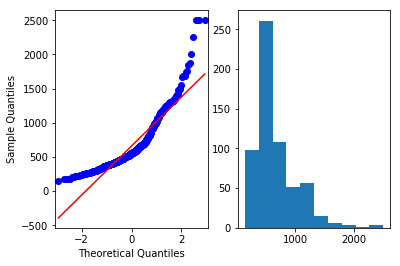

In [16]:
d1 = e.loc[e.area_mean]
d2 = e.loc[~isnan(e.smoothness_se)]
m = pd.concat([d1, d2])
d = m.area_mean.dropna()
f, ax = plt.subplots(1, 2)
qqplot(d, line='s', ax = ax[0])
ax[1] = plt.hist(d)
for a in [0.05, 0.01]:
    s, p = shapiro(d)
    print(s, p, a, "normal" if p > a else "no normal")
plt.show()

A simple vista se puede apreciar que en cuanto a la gráfica de de la izquierda, no hay un comportamiento tan distinto en todas las gráficas, incluso cuando algunas están correlacionadas y las otras no.

Se realizan entonces más pruebas para tener datos más contundentes.

In [30]:
import pandas as pd
from scipy.stats import shapiro, mannwhitneyu, wilcoxon,  kruskal
import ssl

def prueba(d1, d2, a = 0.05, k = 20):
    if min(len(d1), len(d2)) < k:
        return None # no se puede concluir nada con tan pocos datos                                                                                                                               
    else:
        return mannwhitneyu(d1, d2)[1] > a # True si es la misma distribución                                                                                                                     

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
m = pd.read_csv("https://raw.githubusercontent.com/mayraberrones94/Ciencia_de_Datos/master/w-data.csv")

pares = dict()
x = m.loc[~isnan(m.perimeter_mean) & ~isnan(m.radius_worst)]
pares['perimeter mean vs. radius worst'] = (x.perimeter_mean, x.radius_worst)
x = m.loc[~isnan(m.area_mean) & ~isnan(m.radius_worst)]
pares['area mean vs. radius worst'] = (x.area_mean, x.radius_worst)
x = m.loc[~isnan(m.texture_mean) & ~isnan(m.texture_worst)]
pares['texture mean vs. texture worst'] = (x.texture_mean, x.texture_worst)
x = m.loc[~isnan(m.area_mean) & ~isnan(m.radius_worst)]
pares['area mean vs. radius worst'] = (x.area_mean, x.radius_worst)
a = 0.05                                                                                                              
for d in pares:
    (d1, d2) = pares[d]
    print('datos insuficientes' if min(len(d1), len(d2)) < 20 else \
          "iguales" if wilcoxon(d1, d2)[1] > a else "diferentes", "para", d)
    
niv = {'radius mean': [g[1].diagnosis.dropna() for g in m.groupby(['radius_mean'])], \
       'area mean':  [g[1].diagnosis.dropna() for g in m.groupby(['area_mean'])], \
        'perimeter mean':  [g[1].diagnosis.dropna() for g in m.groupby(['perimeter_mean'])], \
        'texture mean':  [g[1].diagnosis.dropna() for g in m.groupby(['texture_mean'])], \
        'radius worst':  [g[1].diagnosis.dropna() for g in m.groupby(['radius_worst'])], \
        'texture worst':  [g[1].diagnosis.dropna() for g in m.groupby(['texture_worst'])], \

      }

print('\n'.join([("insufientes datos" if min([len(x) for x in niv[d]]) < 1 else \
                  "sin diferencia" if kruskal(*niv[d])[1] > a else "hay diferencia") +  \
                 " para " +  d for d in niv]))

diferentes para perimeter mean vs. radius worst
diferentes para area mean vs. radius worst
diferentes para texture mean vs. texture worst
hay diferencia para radius mean
sin diferencia para area mean
sin diferencia para perimeter mean
sin diferencia para texture mean
hay diferencia para radius worst
sin diferencia para texture worst


Como se puede apreciar después de realizar las pruebas, se tiene que el radius mean y el radius worst son los únicos que presentan diferencia. En el experimento siguiente se toman estos dos elementos para compararlos entre ellos.

/Users/mayraberrones/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning:


Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike

/Users/mayraberrones/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning:


Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike



normal


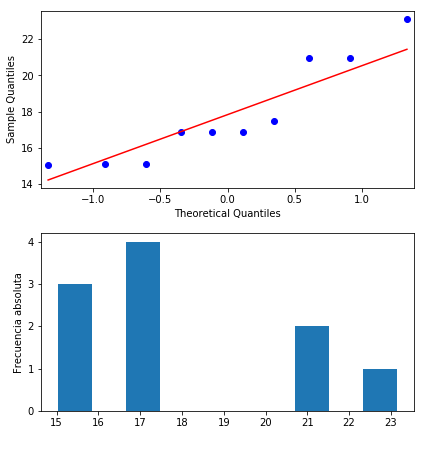

In [36]:
import pandas as pd
from numpy import isnan
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import ssl

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
d = pd.read_csv("https://raw.githubusercontent.com/mayraberrones94/Ciencia_de_Datos/master/w-data.csv")

d1 = d.loc[d.radius_worst]

d2 = d.loc[d.radius_mean]

m = pd.concat([d1, d2])

d = m.radius_worst.dropna()
plt.rcParams["figure.figsize"] = [6, 9]
f = plt.figure()  
qqplot(d, line='s', ax = f.add_subplot(311))
sf = f.add_subplot(312)
sf.hist(d)
sf.set_xlabel(" ")
sf.set_ylabel("Frecuencia absoluta")
a = 0.05
print("normal" if shapiro(d)[1] > a else "no normal")
pares = dict()
x = m.loc[~isnan(m.radius_worst) & ~isnan(m.radius_mean)]
pares['segundas'] = (x.radius_worst, x.radius_mean)
                                                                                                        


plt.tight_layout()
plt.show()

In [9]:
import matplotlib.pyplot as plt
from scipy import stats
from numpy import isnan
import pandas as pd
import ssl

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
o = pd.read_csv("https://raw.githubusercontent.com/mayraberrones94/Ciencia_de_Datos/master/w-data.csv")
e = o.loc[o.diagnosis == 'M']
m = pd.concat([e.loc[e.radius_mean], e.loc[~isnan(e.radius_worst)]])

y = m.radius_worst # lo que se modela
x = m.diagnosis # en función de qué se modela, es decir, queremos un y = f(x) = a * x + b
mascara = ~isnan(x) & ~isnan(y)
x = x[mascara]
y = y[mascara]

a, b, r, p, e = stats.linregress(x, y)
print("y = f(x) = {:.4f} x + {:.4f}".format(a, b))
print("error", e)
print("valor p", p)
print("pendiente {:s}significativo".format("no " if p >= 0.05 else ""))
print("R^2", r**2)

plt.plot(x, (a * x + b), label = 'y = {:.1f}x + {:.0f}'.format(a, b), color = 'red', linewidth = 3)
plt.scatter(x, y)
plt.legend(loc='upper left')
plt.xlabel("radius_mean")
plt.ylabel("radius_worst")
plt.show()

/Users/mayraberrones/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  # This is added back by InteractiveShellApp.init_path()


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''